# Régression Linéaire Multiple : Version Matricielle

## 1. Modèle Mathématique (Notation Matricielle)

La régression linéaire multiple s'écrit en notation matricielle :

$$
\mathbf{y} = \mathbf{X} \cdot \mathbf{w} + \mathbf{b}
$$

### Définition des Termes

- $\mathbf{X}$ : Matrice $m \times n$, représentant les données d'entrée ($m$ échantillons, $n$ variables indépendantes).
- $\mathbf{w}$ : Vecteur colonne $n \times 1$, contenant les poids ou coefficients ($w_1, w_2, \dots, w_n$).
- $\mathbf{b}$ : Scalaire (ou vecteur $m \times 1$), représentant le biais.
- $\mathbf{y}$ : Vecteur $m \times 1$, contenant les valeurs cibles.

---

## 2. Fonction de Coût : Erreur Quadratique Moyenne (MSE)

La fonction de coût mesure l'écart entre les prédictions $\hat{\mathbf{y}}$ et les valeurs réelles $\mathbf{y}$. Elle est définie comme :

$$
J(\mathbf{w}, \mathbf{b}) = \frac{1}{2m} \| \mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y} \|^2
$$

### Développement

$$
J(\mathbf{w}, \mathbf{b}) = \frac{1}{2m} \left( (\mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y})^\top \cdot (\mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y}) \right)
$$

---

## 3. Descente de Gradient

La descente de gradient ajuste les paramètres $\mathbf{w}$ et $\mathbf{b}$ pour minimiser la fonction de coût $J$.

### Mise à Jour des Poids ($\mathbf{w}$)

$$
\mathbf{w} = \mathbf{w} - \alpha \cdot \frac{\partial J}{\partial \mathbf{w}}
$$

### Mise à Jour du Biais ($\mathbf{b}$)

$$
\mathbf{b} = \mathbf{b} - \alpha \cdot \frac{\partial J}{\partial \mathbf{b}}
$$

où $\alpha$ est le taux d'apprentissage.

---

## 4. Calcul des Gradients

### Gradient par Rapport aux Poids ($\mathbf{w}$)

$$
\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m} \cdot \mathbf{X}^\top \cdot \left( \mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y} \right)
$$

### Gradient par Rapport au Biais ($\mathbf{b}$)

Si $\mathbf{b}$ est constant pour tous les échantillons :

$$
\frac{\partial J}{\partial \mathbf{b}} = \frac{1}{m} \cdot \sum \left( \mathbf{X} \cdot \mathbf{w} + \mathbf{b} - \mathbf{y} \right)
$$

---

## 5. Résolution Analytique (Formule Fermée)

La minimisation de $J$ peut également être résolue analytiquement avec la **formule normale** :

$$
\mathbf{w} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \cdot \mathbf{X}^\top \cdot \mathbf{y}
$$

### Ajout du Biais

Pour inclure $\mathbf{b}$ dans $\mathbf{w}$, on peut ajouter une colonne de $1$ à la matrice $\mathbf{X}$.

---

## 6. Interprétation des Coefficients

- Chaque coefficient $w_j$ dans $\mathbf{w}$ représente l'effet marginal de $x_j$ sur $y$, toutes les autres variables étant constantes.
- Le biais $b$ est l'interception du modèle, c'est-à-dire la valeur prédite de $y$ lorsque toutes les variables $x_1, x_2, \dots, x_n$ valent zéro.

In [ ]:
from sklearn.datasets import make_regression
import numpy as np

# Générer des données synthétiques
X, y = make_regression(n_samples=10000, n_features=3, noise=0.1)

# Ajouter une colonne de 1 pour le biais
X = np.hstack((np.ones((X.shape[0], 1)), X))


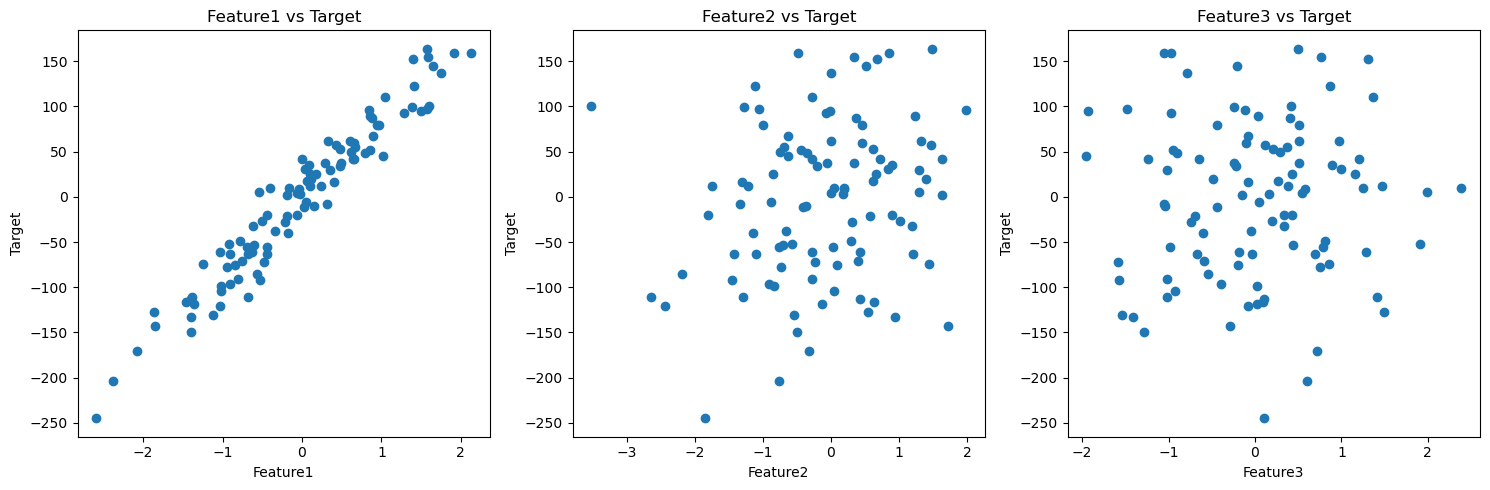

In [3]:
# Créer des graphiques scatter entre y et chaque variable x1, x2, ...
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(df['Feature1'], df['Target'])
axs[0].set_xlabel('Feature1')
axs[0].set_ylabel('Target')
axs[0].set_title('Feature1 vs Target')

axs[1].scatter(df['Feature2'], df['Target'])
axs[1].set_xlabel('Feature2')
axs[1].set_ylabel('Target')
axs[1].set_title('Feature2 vs Target')

axs[2].scatter(df['Feature3'], df['Target'])
axs[2].set_xlabel('Feature3')
axs[2].set_ylabel('Target')
axs[2].set_title('Feature3 vs Target')

plt.tight_layout()
plt.show()

In [ ]:
# Initialiser les poids et le biais
def initialize_parameters(n):
    w = np.zeros((n, 1))
    b = 0
    return w, b

# Fonction de coût
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = (1 / (2 * m)) * np.sum((X.dot(w) + b - y) ** 2)
    return cost

# Calcul des gradients
def compute_gradients(X, y, w, b):
    m = X.shape[0]
    dw = (1 / m) * X.T.dot(X.dot(w) + b - y)
    db = (1 / m) * np.sum(X.dot(w) + b - y)
    return dw, db

# Descente de gradient
def gradient_descent(X, y, w, b, alpha, num_iterations):
    cost_history = []
    for i in range(num_iterations):
        dw, db = compute_gradients(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history

# Prédictions
def predict(X, w, b):
    return X.dot(w) + b

# Initialiser les paramètres
n = X.shape[1]
w, b = initialize_parameters(n)

# Effectuer la descente de gradient
alpha = 0.01
num_iterations = 1000
w, b, cost_history = gradient_descent(X, y.reshape(-1, 1), w, b, alpha, num_iterations)

# Prédictions
y_pred = predict(X, w, b)

# Afficher les résultats
print("Coefficients:", w)
print("Biais:", b)
print("Coût final:", cost_history[-1])